### AI Lab (ID5003W) -  Assignment 1 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

### Google colab link : - https://colab.research.google.com/drive/10YSYUANd1ftJqbHd-ExCW4kFINlGN1ML?usp=sharing

#### Submission Deadline: 31/05/2023  -  23:59

# Question: 01

**MAP REDUCE - DATASET:** write map reduce program(s) using python-mr in colab notebook and complete the following exercises

  - Find the files which contain the following phrases
    - “draping the folds of her velvet dress”
    - “grim clasp to the iron stanchions”
    - “Lo, I teach you the Superman!”
    - “Through that divine allegiance”
  - Find the file which has maximum number of tokens
  - Find the file which has the longest sentence (a sentence ends in a full stop and can span multiple lines)


**Dataset:** 

  - [pg1513.txt](https://www.gutenberg.org/cache/epub/1513/pg1513.txt)<br>
  - [2160-0.txt](https://www.gutenberg.org/files/2160/2160-0.txt)<br>
  - [pg11.txt](https://www.gutenberg.org/cache/epub/11/pg11.txt)<br>
  - [pg2600.txt](https://www.gutenberg.org/cache/epub/2600/pg2600.txt)<br>
  - [345.txt.utf-8](https://www.gutenberg.org/ebooks/345.txt.utf-8)<br>
  - [64317.txt.utf-8](https://www.gutenberg.org/ebooks/64317.txt.utf-8)<br>
  - [70815.txt.utf-8](https://www.gutenberg.org/ebooks/70815.txt.utf-8)<br>
  - [1080-0.txt](https://www.gutenberg.org/files/1080/1080-0.txt)<br>
  - [70817.txt.utf-8](https://www.gutenberg.org/ebooks/70817.txt.utf-8)<br>
  - [1998.txt.utf-8](https://www.gutenberg.org/ebooks/1998.txt.utf-8)<br>



## Answer: 01

#### Supporting URL
#### https://mrjob.readthedocs.io/en/latest/

#### Importing common library 

In [ ]:
import os
import urllib.request

In [ ]:
basePath = '/content/sample_data/'

In [ ]:
os.chdir(basePath)
!mkdir 'Assignment 1'

mkdir: cannot create directory ‘Assignment 1’: File exists


In [ ]:
workingPath = '/content/sample_data/Assignment 1'#'C:/Users/Admin/Coding-M-Tech/AI Lab 2 - ID5003W/Assignment 1'

In [ ]:
!pip install --quiet mrjob

#### Changing the working directory 

In [ ]:
os.chdir(workingPath)

#### Common Variable

In [ ]:
## All the downloadable url
url_pg1513 = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
url_2160 = 'https://www.gutenberg.org/files/2160/2160-0.txt'
url_pg11 = 'https://www.gutenberg.org/cache/epub/11/pg11.txt'
url_pg2600 = 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt'
url_pg345 = 'https://www.gutenberg.org/cache/epub/345/pg345.txt'
url_pg64317 = 'https://www.gutenberg.org/cache/epub/64317/pg64317.txt'
url_pg70815 = 'https://www.gutenberg.org/cache/epub/70815/pg70815.txt'
url_1080 = 'https://www.gutenberg.org/files/1080/1080-0.txt'
url_pg70817 = 'https://www.gutenberg.org/cache/epub/70817/pg70817.txt'
url_pg1998 = 'https://www.gutenberg.org/cache/epub/1998/pg1998.txt'

#### Map reduce Functionality 

#### Phrase Searcher

In [ ]:
%%file phrase_search.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import os

class FindPhrase(MRJob):
     
    def configure_args(self):
        super(FindPhrase, self).configure_args()
        self.add_passthru_arg('--phrase', type=str, help='Phrase to find in files')

    def mapper_init(self):
        self.phrase = self.options.phrase

    def mapper(self, _, line):
        filename = os.getenv('mapreduce_map_input_file')
        file_name = filename.split('/')[-1]
        if self.phrase in line:
            yield (self.phrase,file_name), 1

    def reducer(self, key, values): 
        yield key, f"{sum(values)} occurance of : {key[0]} phrase, is present in : {key[1]} file"

if __name__ == '__main__':
    FindPhrase.run()


Overwriting phrase_search.py


#### Max Token Searcher

In [ ]:
%%file max_token_search.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import os

class FindMaxToken(MRJob):
     
    def mapper(self, _, line):
        filename = os.getenv('mapreduce_map_input_file')
        tokens = line.strip().split()
        file_name = filename.split('/')[-1]
        yield file_name, len(tokens)

    def reducer(self, key, values):
        yield key, f" file has token value of : {sum(values) }"

if __name__ == '__main__':
    FindMaxToken.run()



Overwriting max_token_search.py


#### Maximum Length Sentence

In [ ]:
%%file max_length_search.py
import os
from mrjob.job import MRJob
from mrjob.step import MRStep

class MaxSentenceLength(MRJob):

    def mapper_init(self):
        self.current_sentence = ''

    def mapper(self, _, value):
        file_name = os.getenv('mapreduce_map_input_file')
        line = ' '.join(value.encode("ascii", "ignore").decode().split())
        if '.' in line:
            dot_split = line.split('.')
            current_sentence = '' + self.current_sentence
            if len(dot_split) > 1:
                self.current_sentence = '. '.join(dot_split[1:])
            else:
                self.current_sentence = ''
            yield file_name, max((current_sentence + ' ' + dot_split[0]).split('. '))
        else:
            if line != '':
                self.current_sentence += ' ' + line
            else:
                self.current_sentence += '. ' + line

    def reducer(self, key, values):
        sentence = max(list(values), key=len)
        sentence_length = len(sentence)
        yield key, f"Maximum length of sentence is {sentence_length} from {key} file. Longest Sentence of {key} file is :{sentence}"

    def steps(self):
        return [
            MRStep(mapper_init=self.mapper_init, mapper=self.mapper, reducer=self.reducer)
        ]

if __name__ == '__main__':
    MaxSentenceLength.run()



Overwriting max_length_search.py


#### Creating a dataset folder

In [ ]:
!mkdir Q1-Dataset

mkdir: cannot create directory ‘Q1-Dataset’: File exists


#### Downloading the file

In [ ]:
urllib.request.urlretrieve(url_pg1513,'Q1-Dataset/pg1513.txt')
urllib.request.urlretrieve(url_2160,'Q1-Dataset/2160-0.txt')
urllib.request.urlretrieve(url_pg11,'Q1-Dataset/pg11.txt')
urllib.request.urlretrieve(url_pg2600,'Q1-Dataset/pg2600.txt')
urllib.request.urlretrieve(url_pg345,'Q1-Dataset/pg345.txt')
urllib.request.urlretrieve(url_pg64317,'Q1-Dataset/pg64317.txt')
urllib.request.urlretrieve(url_pg70815,'Q1-Dataset/pg70815.txt')
urllib.request.urlretrieve(url_1080,'Q1-Dataset/1080-0.txt')
urllib.request.urlretrieve(url_pg70817,'Q1-Dataset/pg70817.txt')
urllib.request.urlretrieve(url_pg1998,'Q1-Dataset/pg1998.txt')

('Q1-Dataset/pg1998.txt', <http.client.HTTPMessage at 0x7fa08fa7dff0>)

##### 1a. Running Phrase Finder method

In [ ]:
!python phrase_search.py --phrase="draping the folds of her velvet dress" "Q1-Dataset/"

!python phrase_search.py --phrase="grim clasp to the iron stanchions" "Q1-Dataset/"

!python phrase_search.py --phrase="Lo, I teach you the Superman!" "Q1-Dataset/"

!python phrase_search.py --phrase="Through that divine allegiance" "Q1-Dataset/"

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/phrase_search.root.20230529.153432.913885
Running step 1 of 1...
job output is in /tmp/phrase_search.root.20230529.153432.913885/output
Streaming final output from /tmp/phrase_search.root.20230529.153432.913885/output...
["draping the folds of her velvet dress", "pg2600.txt"]	"1 occurance of : draping the folds of her velvet dress phrase, is present in : pg2600.txt file"
Removing temp directory /tmp/phrase_search.root.20230529.153432.913885...
No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/phrase_search.root.20230529.153433.619584
Running step 1 of 1...
job output is in /tmp/phrase_search.root.20230529.153433.619584/output
Streaming final output from /tmp/phrase_search.root.20230529.153433.619584/output...
["grim clasp to the iron stanchions", "pg345.txt"]	"1 occurance of : grim clasp to the ir

### Conclusion 1a .
#### ***"draping the folds of her velvet dress"*** phrase is available in **pg2600.txt** file
#### ***"grim clasp to the iron stanchions"***   phrase is available in **pg345.txt** file
#### ***"Lo, I teach you the Superman!"***  phrase is available in **1998.txt** file

##### 1b. Running Max Token Finder method

In [ ]:
!python max_token_search.py "Q1-Dataset/*"

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/max_token_search.root.20230529.165516.543374
Running step 1 of 1...
job output is in /tmp/max_token_search.root.20230529.165516.543374/output
Streaming final output from /tmp/max_token_search.root.20230529.165516.543374/output...
"1080-0.txt"	" file has token value of : 6512"
"2160-0.txt"	" file has token value of : 151379"
"pg11.txt"	" file has token value of : 29590"
"pg1513.txt"	" file has token value of : 29002"
"pg1998.txt"	" file has token value of : 113997"
"pg345.txt"	" file has token value of : 164459"
"pg64317.txt"	" file has token value of : 51257"
"pg70815.txt"	" file has token value of : 82782"
"pg70817.txt"	" file has token value of : 28184"
"pg2600.txt"	" file has token value of : 566330"
Removing temp directory /tmp/max_token_search.root.20230529.165516.543374...


### Conclusion 1b. 
#### **pg2600.txt** has maximum number of token i.e. **566330**

##### 1c. Running Find Max Sentence Length method

In [ ]:
!python max_length_search.py "Q1-Dataset/*"

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/max_length_search.root.20230529.170157.555981
Running step 1 of 1...
job output is in /tmp/max_length_search.root.20230529.170157.555981/output
Streaming final output from /tmp/max_length_search.root.20230529.170157.555981/output...
"file://Q1-Dataset/1080-0.txt"	"Maximum length of sentence is 1044 from file://Q1-Dataset/1080-0.txt file. Longest Sentence of file://Q1-Dataset/1080-0.txt file is : And secondly, There being a round million of creatures in humane figure throughout this kingdom, whose whole subsistence put into a common stock, would leave them in debt two million of pounds sterling, adding those who are beggars by profession, to the bulk of farmers, cottagers and labourers, with their wives and children, who are beggars in effect; I desire those politicians who dislike my overture, and may perhaps be so bold to attempt an answer, that they will first ask 

### Conclusion 1c. 
#### Maximum length of sentence is ***2078*** from ***2160-0.txt*** file

# Conclusion of Question 1: 

### Q. Find the files which contain the following phrases
### A. "**draping the folds of her velvet dress**" phrase is available in **pg2600.txt** file
### "**grim clasp to the iron stanchions**"   phrase is available in **pg345.txt** file
### "**Lo, I teach you the Superman!**"  phrase is available in **1998.txt** file


### Q. Find the file which has maximum number of tokens
### A. **pg2600.txt** has maximum number of token i.e. **566330**


### Q. Find the file which has the longest sentence (a sentence ends in a full stop and can span multiple lines)
### A. Maximum length of sentence is **2078** from **2160-0.txt** file


# Question: 02

**Write a PySpark RDD program to compute:**


  - The list of common (overlapping / intersection ) words across all the ten files listed above.
  - List the word frequency of common words across files as a dict ( tip: use join method in the rdd). The size of the dict equals the list of common words and each key in the top level dict contains the word count corresponding to all the ten files

    - {“word”: {“pg1513.txt”:10,”2160-0.txt”:25,... } 


## Answer: 02

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Importing library

In [ ]:
from pyspark import SparkConf, SparkContext
from operator import add
import pandas as pd
import re

#### Common Variable Declaration

In [ ]:
# Initialize Spark
spark_config = SparkConf().setMaster('local').setAppName('CommonWordsApp')
spark_context = SparkContext.getOrCreate(conf=spark_config)

# Define the list of files
file_paths = ['Q1-Dataset/pg1513.txt','Q1-Dataset/2160-0.txt','Q1-Dataset/pg11.txt',
              'Q1-Dataset/pg2600.txt','Q1-Dataset/pg345.txt','Q1-Dataset/pg64317.txt',
              'Q1-Dataset/pg70815.txt','Q1-Dataset/1080-0.txt','Q1-Dataset/pg70817.txt',
              'Q1-Dataset/pg1998.txt']

# Initialize the word frequency dictionary
word_frequency_dict = {}

In [ ]:
def clean_word(word):
    return re.sub(r'[^\w\s]', '', word).lower()

#### Perfom the main operation of searching 

In [ ]:
# Process each file to compute word frequencies and intersection of words
for file_index, file_path in enumerate(file_paths):
    file_rdd = spark_context.textFile(file_path)
    word_rdd = file_rdd.flatMap(lambda line: line.split(" ")).map(lambda word: clean_word(word))
    word_frequency = word_rdd.countByValue()

    # Compute frequencies and intersection
    for word, frequency in word_frequency.items():
        if word not in word_frequency_dict:
            word_frequency_dict[word] = {}
        word_frequency_dict[word][file_path] = frequency

    if file_index == 0:
        intersecting_words_rdd = word_rdd
    else:
        intersecting_words_rdd = intersecting_words_rdd.intersection(word_rdd)

#Collect the common words
common_words = intersecting_words_rdd.distinct().collect()

#Removing the pure number
common_words = [element for element in common_words if element.isnumeric() != True]

#Removing alpha numeric like 1e and 2f etc.
common_words = [element for element in common_words if element.isalpha() == True]

#Removing empty string 
common_words = [element for element in common_words if element != ""]

# Filter the frequency dictionary to include only common words
common_words_frequency_dict = {word: word_frequency_dict[word] for word in common_words}

print(f"Common word count is {len(common_words)}")
print(f"Common words are: {common_words}")


Common word count is 816
Common words are: ['rather', 'references', 'two', 'immediate', 'family', 'of', 'accessible', 'ago', 'away', 'official', 'right', 'before', 'ready', 'lieu', 'volunteers', 'permanent', 'than', 'computers', 'sent', 'united', 'law', 'damage', 'her', 'wwwgutenbergorgcontact', 'gross', 'agent', 'would', 'putting', 'something', 'registered', 'anything', 'was', 'put', 'agreement', 'us', 'leave', 'think', 'particular', 'never', 'true', 'help', 'especially', 'format', 'files', 'links', 'language', 'allow', 'entity', 'have', 'expense', 'no', 'ein', 'four', 'die', 'charities', 'appears', 'thousand', 'equipment', 'demand', 'is', 'support', 'bring', 'though', 'opportunity', 'renamed', 'thus', 'till', 'making', 'derive', 'prohibition', 'solicit', 'manager', 'free', 'send', 'indicate', 'bear', 'viewing', 'strength', 'head', 'rules', 'phrase', 'obtain', 'share', 'displayed', 'synonymous', 'compliance', 'widest', 'indirect', 'looked', 'poor', 'countries', 'refund', 'freely', 'an

In [ ]:
print(f"Frequencies of the words are :{common_words_frequency_dict}")

Frequencies of the words are :{'rather': {'Q1-Dataset/pg1513.txt': 4, 'Q1-Dataset/2160-0.txt': 43, 'Q1-Dataset/pg11.txt': 25, 'Q1-Dataset/pg2600.txt': 88, 'Q1-Dataset/pg345.txt': 25, 'Q1-Dataset/pg64317.txt': 25, 'Q1-Dataset/pg70815.txt': 15, 'Q1-Dataset/1080-0.txt': 2, 'Q1-Dataset/pg70817.txt': 10, 'Q1-Dataset/pg1998.txt': 40}, 'references': {'Q1-Dataset/pg1513.txt': 2, 'Q1-Dataset/2160-0.txt': 2, 'Q1-Dataset/pg11.txt': 2, 'Q1-Dataset/pg2600.txt': 2, 'Q1-Dataset/pg345.txt': 2, 'Q1-Dataset/pg64317.txt': 2, 'Q1-Dataset/pg70815.txt': 2, 'Q1-Dataset/1080-0.txt': 2, 'Q1-Dataset/pg70817.txt': 2, 'Q1-Dataset/pg1998.txt': 2}, 'two': {'Q1-Dataset/pg1513.txt': 20, 'Q1-Dataset/2160-0.txt': 144, 'Q1-Dataset/pg11.txt': 37, 'Q1-Dataset/pg2600.txt': 587, 'Q1-Dataset/pg345.txt': 128, 'Q1-Dataset/pg64317.txt': 72, 'Q1-Dataset/pg70815.txt': 118, 'Q1-Dataset/1080-0.txt': 8, 'Q1-Dataset/pg70817.txt': 26, 'Q1-Dataset/pg1998.txt': 47}, 'immediate': {'Q1-Dataset/pg1513.txt': 2, 'Q1-Dataset/2160-0.txt': 12, 

In [ ]:
print('Frequencies of the words in tabuler format')
words = pd.DataFrame.from_dict(common_words_frequency_dict, orient = 'columns')
display(words)
words.to_excel('words.xlsx')

Frequencies of the words in tabuler format


,rather,references,two,immediate,family,of,accessible,ago,away,official,...,need,paragraphs,through,described,professor,damaged,talk,receive,party,given
Q1-Dataset/pg1513.txt,4,2,20,2,2,518,1,2,25,3,...,11,3,10,1,1,1,12,3,1,1
Q1-Dataset/2160-0.txt,43,2,144,12,113,5676,2,45,51,3,...,12,3,75,5,4,5,11,24,14,54
Q1-Dataset/pg11.txt,25,2,37,3,1,632,1,2,27,3,...,1,3,15,1,1,1,14,2,9,2
Q1-Dataset/pg2600.txt,88,2,587,10,135,14994,4,74,613,33,...,108,5,378,31,2,3,251,43,70,179
Q1-Dataset/pg345.txt,25,2,128,6,3,3746,1,26,187,6,...,69,3,214,7,156,1,34,6,12,43
Q1-Dataset/pg64317.txt,25,2,72,5,13,1233,1,19,76,4,...,4,3,68,4,1,1,12,2,19,8
Q1-Dataset/pg70815.txt,15,2,118,7,1,3108,1,6,71,4,...,14,3,107,2,1,1,5,5,43,15
Q1-Dataset/1080-0.txt,2,2,8,2,2,261,1,1,3,3,...,1,3,5,1,1,1,2,2,1,1
Q1-Dataset/pg70817.txt,10,2,26,6,3,769,1,8,35,3,...,2,4,43,2,1,2,3,2,7,4
Q1-Dataset/pg1998.txt,40,2,47,3,1,2895,1,6,116,3,...,22,8,76,3,1,1,34,5,3,37


In [ ]:
spark_context.stop()

# Conclusion of Question 2: 
#### To consider as a valid word we are not considering any special character and number, hence we are considering only the alphabet.

#### There are 816 common words available and there corresponding frequency of occurance in different files are displayed in tabuler format.

# Question: 03

Perform an exploratory data analysis on the primary_data.csv of the Mushroom dataset [Secondary Mushroom Dataset](https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset) using pandas and answer the following questions:
  - How many mushrooms are poisonous?
  - Which family contains most poisonous mushrooms?
  - Do all poisonous mushrooms have a ring?
  - Which seasons do poisonous mushrooms grow typically?

## Answer: 03

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Common Variables

In [ ]:
working_dir_path = '/content/sample_data/Assignment 1/Q3-Dataset/MushroomDataset'#'C:/Users/Admin/Coding-M-Tech/AI Lab 2 - ID5003W/Assignment 1/Q3-Dataset/MushroomDataset'
primaryFileName = 'primary_data.csv'
Q3basePath = '/content/sample_data/Assignment 1'

#### File and folder operation

In [ ]:
os.chdir(Q3basePath)
!mkdir Q3-Dataset
os.chdir(Q3basePath+'/Q3-Dataset/')
!mkdir MushroomDataset

mkdir: cannot create directory ‘Q3-Dataset’: File exists
mkdir: cannot create directory ‘MushroomDataset’: File exists


#### Upload the necessary file inside the Q3-Dataset/MushroomDataset folder before proceeding for further operation

#### Change the folder location 

In [ ]:
os.chdir(working_dir_path)

#### Loading primary data

In [ ]:
df_primary_data = pd.read_csv(primaryFileName,sep=';')

In [ ]:
df_primary_data

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,NaN,[g],[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s]


#### Perform basic statistical analysis and missing value check

In [ ]:
df_primary_data.describe(include='object')

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
count,173,173,173,173,173,133,173,173,145,102,...,27,65,173,9,21,173,166,18,173,173
unique,23,173,2,51,27,40,67,2,8,3,...,5,14,41,1,7,2,13,8,21,10
top,Tricholoma Family,Fly Agaric,p,"[2, 5]",[x],[y],[n],[f],[a],[c],...,[s],[s],[w],[u],[w],[f],[f],[k],[d],"[u, a]"
freq,43,1,96,16,48,14,38,143,32,70,...,9,15,57,9,15,130,137,5,104,106


In [ ]:
df_primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           133 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       145 non-null    object
 9   gill-spacing          102 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             27 non-null     object
 14  stem-surface          65 non-null     object
 15  stem-color            173 non-null    ob

In [ ]:
df_primary_data.isna().sum().sort_values(ascending=False)

veil-type               164
Spore-print-color       155
veil-color              152
stem-root               146
stem-surface            108
gill-spacing             71
Cap-surface              40
gill-attachment          28
ring-type                 7
family                    0
habitat                   0
has-ring                  0
stem-color                0
stem-height               0
stem-width                0
name                      0
gill-color                0
does-bruise-or-bleed      0
cap-color                 0
cap-shape                 0
cap-diameter              0
class                     0
season                    0
dtype: int64

In [ ]:
poisonous_mushroom = df_primary_data[df_primary_data['class'] == 'p']
edible_mushroom = df_primary_data[df_primary_data['class'] == 'e']

##### Graphical representation of the distribution of poisonous and edible mushroom

==========Distribution of poisonous and edible mushroom============


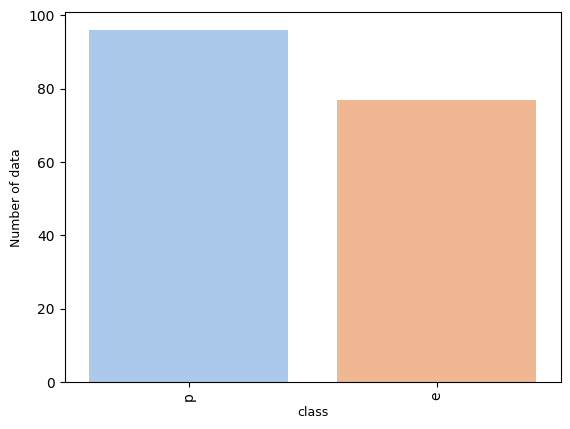

p    96
e    77
Name: class, dtype: int64

In [ ]:
print('==========Distribution of poisonous and edible mushroom============')
mushroom_type_count= df_primary_data['class'].value_counts()  
sns.barplot(x=mushroom_type_count.index, y=mushroom_type_count.values,palette='pastel')
plt.ylabel('Number of data', fontsize=9)
plt.xlabel('class', fontsize=9)
plt.xticks(rotation=90)
plt.show();
df_primary_data['class'].value_counts()

### Q. How many mushrooms are poisonous?
### A. 96 mushrooms are poisonous and 77 are edible

##### Graphical representation of the distribution of poisonous mushroom among different family

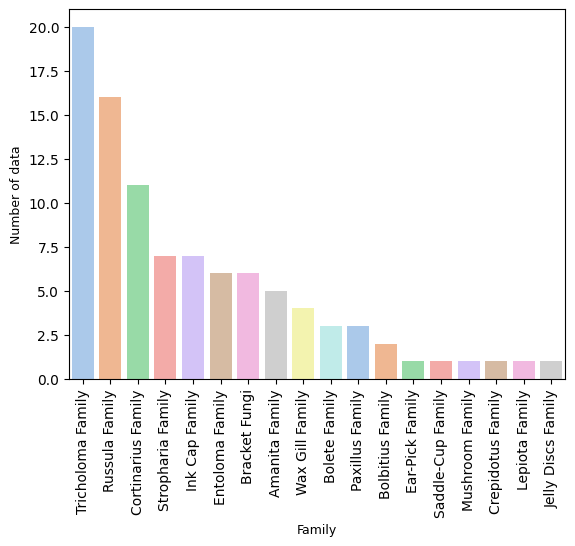

Tricholoma Family         43
Russula Family            27
Bolete Family             14
Ink Cap Family            13
Cortinarius Family        11
Stropharia Family          8
Amanita Family             8
Wax Gill Family            8
Entoloma Family            7
Bracket Fungi              7
Mushroom Family            5
Bolbitius Family           3
Lepiota Family             3
Paxillus Family            3
Chanterelle Family         3
Pluteus Family             2
Oyster Mushroom Family     2
Crepidotus Family          1
Hydnum Family              1
Ear-Pick Family            1
Saddle-Cup Family          1
Morel Family               1
Jelly Discs Family         1
Name: family, dtype: int64

In [ ]:
poisonous_mushroom_type_count= poisonous_mushroom['family'].value_counts()  
sns.barplot(x=poisonous_mushroom_type_count.index, y=poisonous_mushroom_type_count.values,palette='pastel')
plt.ylabel('Number of data', fontsize=9)
plt.xlabel('Family', fontsize=9)
plt.xticks(rotation=90)
plt.show();
df_primary_data['family'].value_counts()

### Q. Which family contains most poisonous mushrooms?
### A. Tricholoma, mushroom family has highest number of poisonous mushrooms.

##### Analysis of poisonous mushroom based on its ring characteristics

In [ ]:
np.unique(poisonous_mushroom['has-ring'])

array(['[f]', '[t]'], dtype=object)

##### It has been observed that the unique value of mushroom has-ring column is [f] & [t], which clearly indicate that only ring exists among the mushroom which has 'has-ring' column value as [t], so we will filter that out and get the desired result.

In [ ]:
ring_poisonous_mushroom = poisonous_mushroom[poisonous_mushroom['has-ring'] != '[t]']

In [ ]:
ring_poisonous_mushroom

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
17,Tricholoma Family,Club-footed Funnel Cap,p,"[4, 8]","[x, f]",NaN,"[g, n]",[f],[d],[c],...,[b],NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]","[a, w]"
20,Tricholoma Family,Ivory Clitocybe,p,"[2, 4]","[x, f, s]",[s],"[w, g]",[f],[d],[c],...,NaN,NaN,[w],NaN,NaN,[f],[f],NaN,[g],"[u, a]"
21,Tricholoma Family,Wood Woolly-foot,p,"[3, 6]",[f],[l],"[n, e, y]",[f],[x],[d],...,NaN,NaN,"[n, y]",NaN,NaN,[f],[f],NaN,"[l, d]","[u, a]"
22,Tricholoma Family,Russet Tough Shank,p,"[2, 5]",[f],[d],"[n, b]",[f],[x],[c],...,[b],"[i, s]",[n],NaN,NaN,[f],[f],NaN,"[l, d]","[u, a]"
23,Tricholoma Family,Clustered Tough Shank,p,"[2, 5]","[x, f]",NaN,"[n, w]",[f],[x],[c],...,NaN,NaN,"[n, p]",NaN,NaN,[f],[f],NaN,"[l, d]","[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Bracket Fungi,Silver Leaf Fungus,p,"[2, 4]",[o],[l],[g],[f],[f],[f],...,[f],[f],[f],NaN,NaN,[f],[f],NaN,[d],"[s, u, a, w]"
166,Bracket Fungi,Fuzzy Polypore,p,"[8, 30]","[f, x]","[g, s, d]","[o, e, n, k]",[f],[p],NaN,...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,[d],"[a, w]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"


### Q. Do all poisonous mushrooms have a ring?
### A. No, all the poisonous mushroom does not have ring, only 70 out of 96 poisonous mushroom have ring.

##### Analysis of poisonous mushroom based on the season 

In [ ]:
np.unique(poisonous_mushroom['season'])

array(['[a, w]', '[a]', '[s, u, a, w]', '[s, u, a]', '[s, u]',
       '[u, a, w]', '[u, a]', '[u]'], dtype=object)

##### Graphical representation of the distribution of poisonous mushroom based on it season of growth

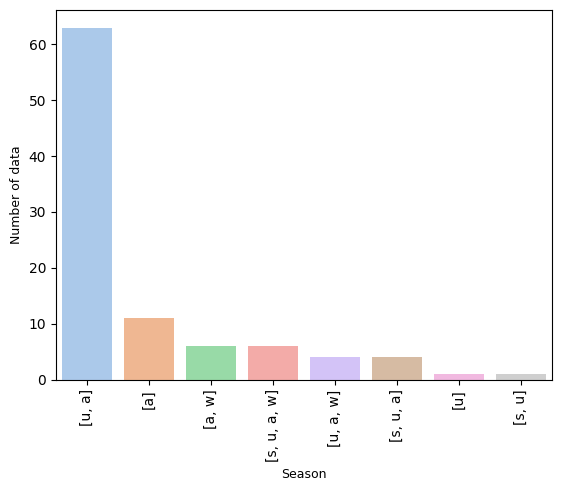

[u, a]          106
[a]              16
[a, w]           15
[s, u, a, w]     13
[u, a, w]        12
[s, u, a]         5
[s, u]            3
[s, a, w]         1
[u]               1
[s]               1
Name: season, dtype: int64

In [ ]:
poisonous_mushroom_type_count= poisonous_mushroom['season'].value_counts()  
sns.barplot(x=poisonous_mushroom_type_count.index, y=poisonous_mushroom_type_count.values, palette='pastel')
plt.ylabel('Number of data', fontsize=9)
plt.xlabel('Season', fontsize=9)
plt.xticks(rotation=90)
plt.show();
df_primary_data['season'].value_counts()

### Q. Which seasons do poisonous mushrooms grow typically?
### A. Over Summer and Autumn most of the poisonous mushrooms typically grows.

# Conclusion of Question 3: 

### Q. How many mushrooms are poisonous?
### A. 96 mushrooms are poisonous and 77 are edible
### Q. Which family contains most poisonous mushrooms?
### A. Tricholoma, mushroom family has highest number of poisonous mushrooms.
### Q. Do all poisonous mushrooms have a ring?
### A. No, all the poisonous mushroom does not have ring, only 70 out of 96 poisonous mushroom have ring.
### Q. Which seasons do poisonous mushrooms grow typically?
### A. Over Summer and Autumn most of the poisonous mushrooms typically grows.